## Analysis of the albums and the critics

In [1]:
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import networkx as nx
import os

In [2]:
#load the network from the pickle file
G = pickle.load(open("song_network.pkl", "rb"))
#make the network undirected
G = G.to_undirected()


In [3]:
#extract the albums from the nodes attributes
#take into account that some of the attribute album are lists
#THIS CAN BE PROBABLY REMOVED WHEN UNIFIYING CODE
albums = []
for node in G.nodes(data=True):
    if type(node[1]['album']) == list:
        albums.extend(node[1]['album'])
    else:
        albums.append(node[1]['album'])

albums = set(albums)
print(albums)

{'evermore', 'Taylor Swift', 'The Tortured Poets Department: The Anthology', 'folklore (deluxe version)', 'reputation Stadium Tour Surprise Song Playlist', '1989 (Deluxe Edition)', "Red (Taylor's Version)", 'The Tortured Poets Department', 'Live From Clear Channel Stripped 2008', 'folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]', 'folklore', 'Midnights (3am Edition)', 'Red', 'evermore (deluxe version)', 'Fearless', 'Fearless Platinum Edition', 'Midnights (The Til Dawn Edition)', 'Midnights', "Fearless (Taylor's Version)", 'Speak Now (Deluxe Edition)', '1989', 'Lover', 'Red (Deluxe Edition)', 'Speak Now', 'reputation', "1989 (Taylor's Version)", "Speak Now (Taylor's Version)", "1989 (Taylor's Version) [Deluxe]"}


In [4]:
#extract the albums from the folder album_reviews
#the album names are the files names
album_metacritics = os.listdir("./data/album_reviews")
album_metacritics = [x.split(".")[0] for x in album_metacritics]

#remove _ and change to lower case
album_metacritics = [x.replace("_", " ") for x in album_metacritics]


In [5]:
#to change the names of the albums in the metractics to the same format as the ones in the network
changed_albums = album_metacritics.copy()
for album in album_metacritics:
    if "THE TORTURED" in album:
        #change to lower case from the second letter for each word
        words = album.split(" ")
        new = ""
        for w in words:
            #keep the first letter and change the rest to lower case
            new += w[0] + w[1:].lower() + " "
        #remove the last space
        new = new[:-1]
        #replace the album name
        changed_albums[changed_albums.index(album)] = new

print(changed_albums)
            
        


['The Tortured Poets Department: The Anthology', 'Red', "Speak Now (Taylor's Version)", 'Taylor Swift', 'reputation', "1989 (Taylor's Version)", 'Speak Now', 'evermore', 'The Tortured Poets Department', "Fearless (Taylor's Version)", 'Midnights', 'Lover', 'folklore', 'Fearless', '1989']


In [6]:
#remove the albums that are in metacritics and not in the network
albums = [x for x in albums if x in changed_albums]

In [7]:
#Create the subgraphs for each album
album_graphs = {}
for album in albums:       
    album_graphs[album] = G.subgraph([n for n in G.nodes() if album in G.nodes[n]['album']])
    

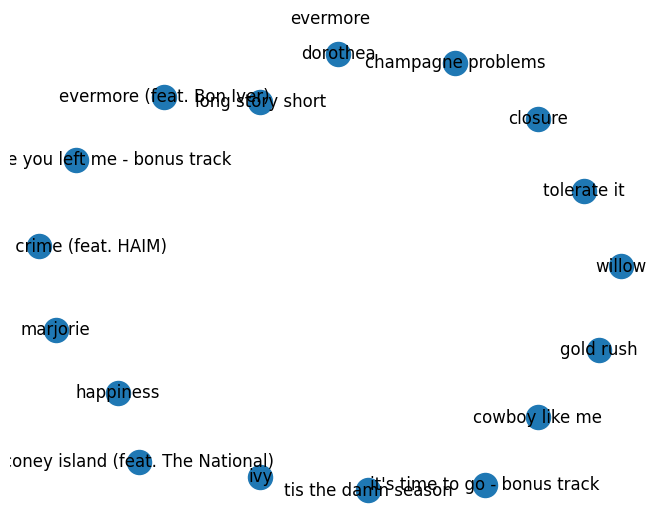

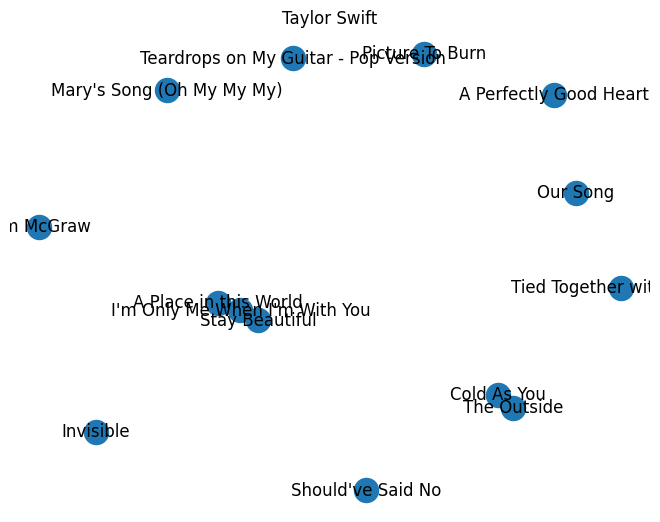

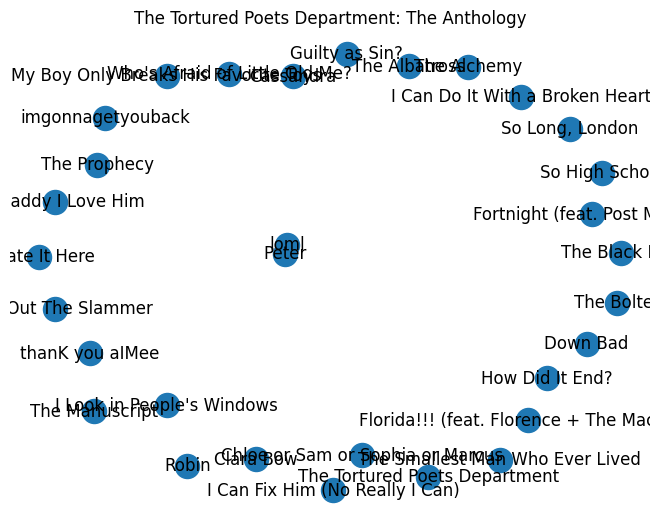

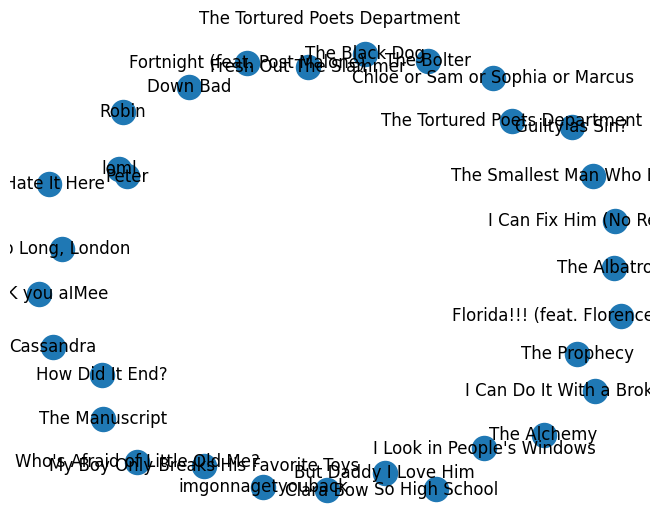

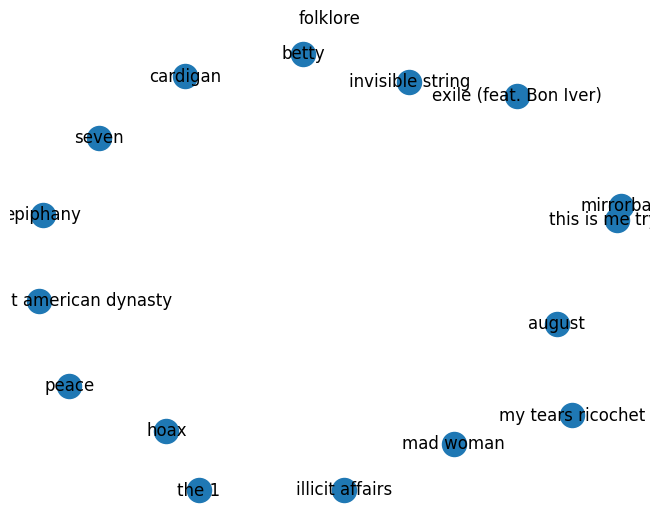

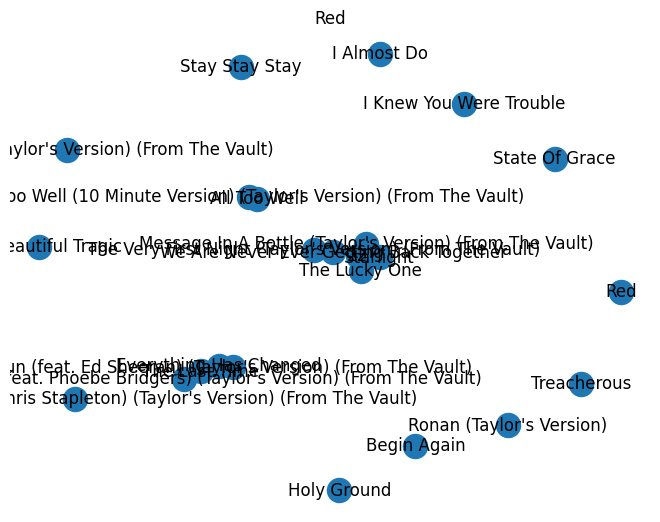

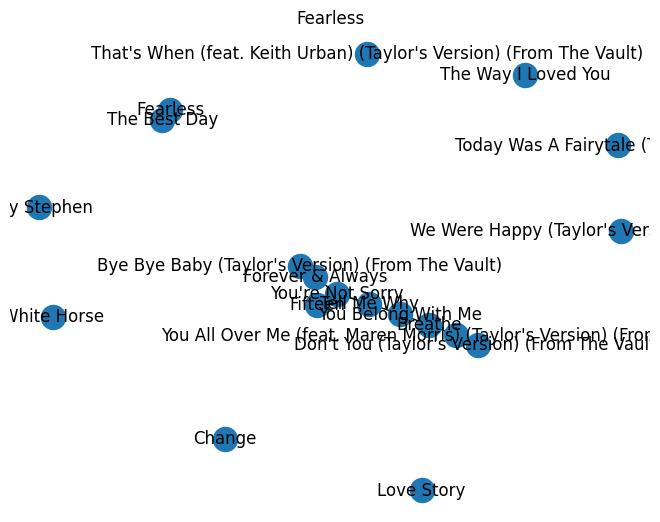

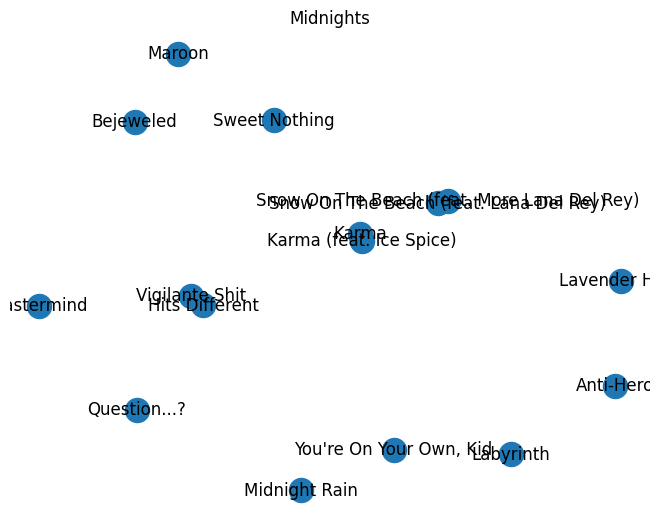

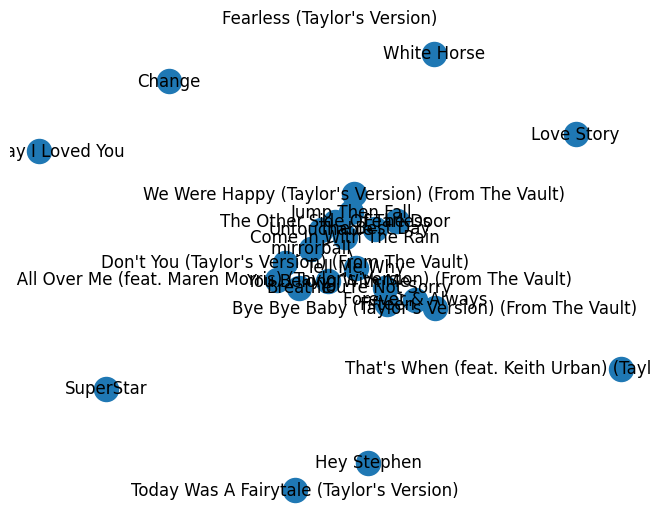

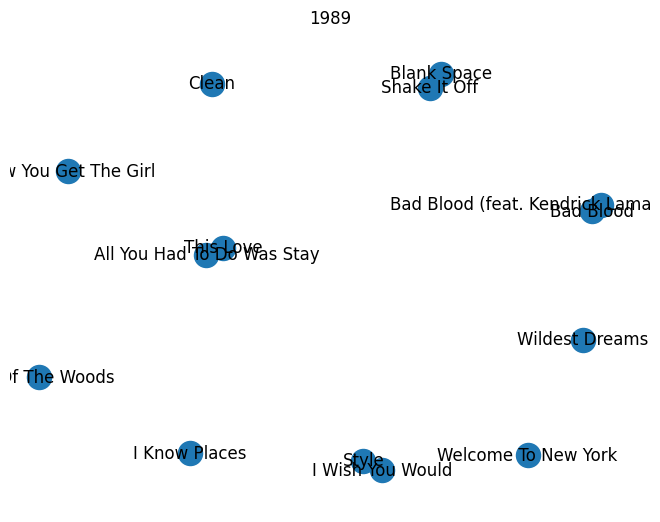

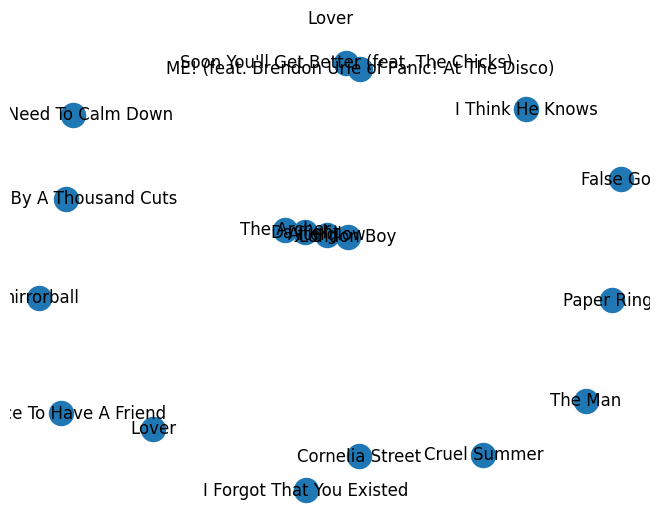

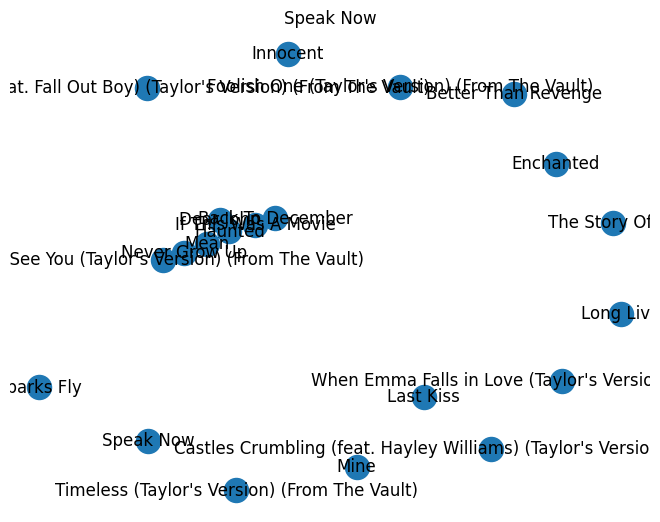

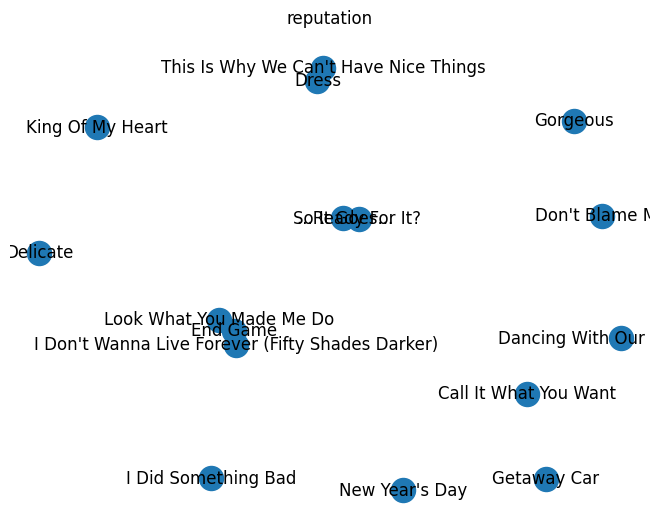

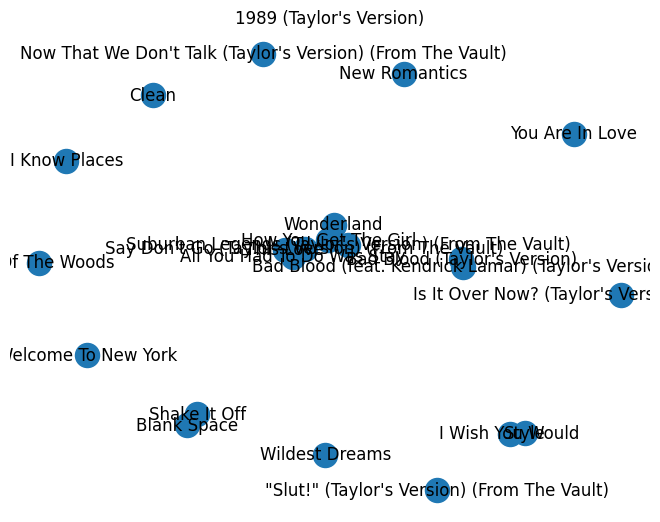

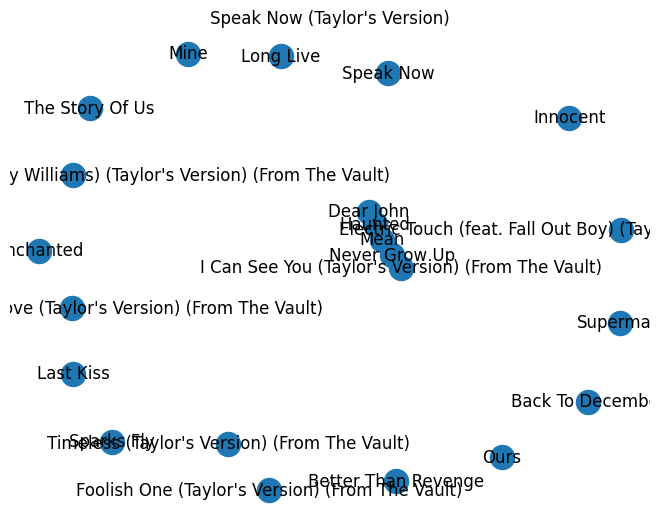

In [8]:
#plot the subgraphs
for album in albums:
    nx.draw(album_graphs[album], with_labels=True)
    plt.title(album)
    plt.show()

In [10]:
#calculate the density of the subgraphs
densities = {}
for album in albums:
    densities[album] = nx.density(album_graphs[album])

In [11]:
#sort densities
densities = dict(sorted(densities.items(), key=lambda item: item[1], reverse=True))
print(densities)

{"Fearless (Taylor's Version)": 0.056666666666666664, 'Fearless': 0.05263157894736842, '1989': 0.04395604395604396, "1989 (Taylor's Version)": 0.03896103896103896, 'reputation': 0.03333333333333333, 'Taylor Swift': 0.03296703296703297, 'Red': 0.03260869565217391, 'Speak Now': 0.02857142857142857, 'Lover': 0.026143790849673203, 'Midnights': 0.025, "Speak Now (Taylor's Version)": 0.017316017316017316, 'folklore': 0.008333333333333333, 'The Tortured Poets Department: The Anthology': 0.002150537634408602, 'The Tortured Poets Department': 0.002150537634408602, 'evermore': 0}
